In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

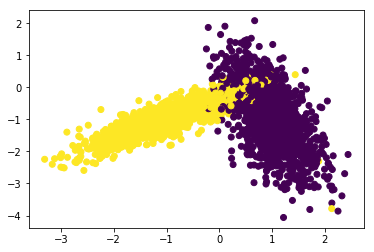

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [28]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    global k_values 
    k_values= sorted(random.sample(range(param_range[0],param_range[1]),10))
    trainscores = []
    testscores = []
    index_tuples = []
    indices = list(range(0,len(x_train),len(x_train)//folds)) #dividing the dataset in "n = folds" folds
    for i in range(len(indices)-1):       #storing the start and end indices values for each fold
        index = (indices[i],indices[i+1])
        index_tuples.append(index)
    index_tuples.append((indices[-1],len(x_train)))
    print('Index tuples: ',index_tuples)
    
    for k in k_values:
        trainscores_folds = []
        testscores_folds  = []

        for index in index_tuples:
            test_indices = list(set(list(range(index[0],index[1]))))
            train_indices = list(set(list(range(len(x_train)))) - set(test_indices))
            train_x = x_train[train_indices]
            train_y = y_train[train_indices]
            test_x = x_train[test_indices]
            test_y = y_train[test_indices]
            classifier.n_neighbors = k
            classifier.fit(train_x,train_y)
            
            y_predicted = classifier.predict(test_x)
            testscores_folds.append(accuracy_score(test_y, y_predicted))
            
            y_predicted = classifier.predict(train_x)
            trainscores_folds.append(accuracy_score(train_y, y_predicted))
            
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()
trainscores, testscores = RandomSearchCV(X_train,y_train,neigh,(2,50),5)

Index tuples:  [(0, 1500), (1500, 3000), (3000, 4500), (4500, 6000), (6000, 7500)]


In [30]:
print(trainscores)

[0.9631666666666667, 0.961, 0.9583999999999999, 0.9573666666666666, 0.9572666666666667, 0.9570333333333334, 0.9573, 0.9572666666666667, 0.9576333333333334, 0.9577333333333333]


In [31]:
print(k_values)

[4, 6, 17, 22, 29, 37, 39, 41, 47, 49]


In [32]:
print(testscores)

[0.9518666666666669, 0.9513333333333334, 0.9548, 0.9545333333333333, 0.9548, 0.9549333333333333, 0.9557333333333332, 0.9555999999999999, 0.9562666666666667, 0.9568000000000001]


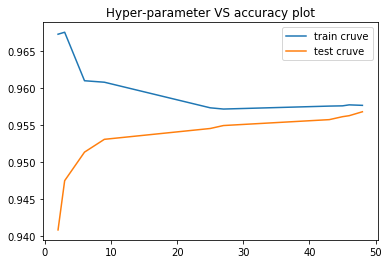

In [27]:
plt.plot(k_values,trainscores, label='train cruve')
plt.plot(k_values,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [33]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

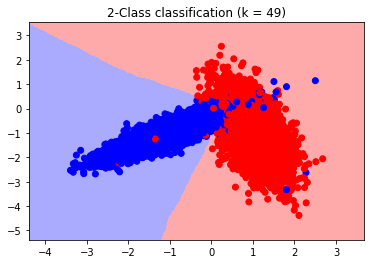

In [34]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 49)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)